# Quickstart

This quick tutorial will guide you through basic usage of this package un well under 5 minuts.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Generate a network

We start to import one of the network models. Let's say the layered model.

In [2]:
from connectome.model import LL

We pre-set some of it's parameters for more convenient usage.

In [3]:
ll = LL(nr_neurons=2000, inh_ratio=.1, p_exc=.2, p_inh=.5, reciprocity_exc=.2)
ll

LL(nr_exc_subpopulations=∅, reciprocity_exc=0.2, p_inh=0.5, p_exc=0.2, nr_neurons=2000, inh_ratio=0.1)

We then generate a network with 3 layers and plot it

In [4]:
network = ll(nr_exc_subpopulations=3)
network

<Network nr_exc=1800, nr_inh=200>

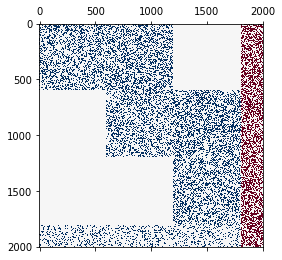

In [5]:
plt.matshow(network.adjacency_matrix, cmap="RdBu");

Let's do another on with 5 layers this time.

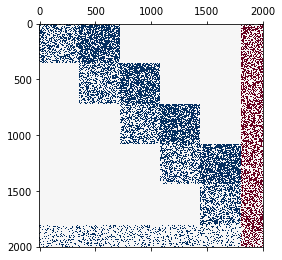

In [6]:
network_5 = ll(nr_exc_subpopulations=5)
plt.matshow(network_5.adjacency_matrix, cmap="RdBu");

Ther was no need to respecify the old parameters. They were stored.

## Analyse a network

We can calculate some summary statistics on the network.

In [7]:
from connectome.analysis import RelativeCycleAnalysis

Let's first check is this network contains many or few cycles, compared to a random netowkr.

In [8]:
cycle_analysis = RelativeCycleAnalysis(length=5)
cycle_analysis

RelativeCycleAnalysis(length=5, network=∅)

In [9]:
cycle_analysis(network=network)

{'relative_cycles_5': 0.19060083049343449}

Apparently it does not contain many cycles of length 5. A value above 1 would be a lot, everything below is not so much. How about the network's reciprocity?

In [10]:
from connectome.analysis import RelativeReciprocityEstimator
RelativeReciprocityEstimator(network=network)()

{'relative_reciprocity_ee': 0.9999751061095437,
 'relative_reciprocity_ei': 1.0039314844866818,
 'relative_reciprocity_ie': 1.0039314844866816,
 'relative_reciprocity_ii': 0.9941351064977253}

In terms of reciprocity it is what would be expected from a pairwise random network.

## Simulate noise

Biology is noisy. We simulate some noise.

In [11]:
from connectome.noise import RemoveAddNoiseAndSubsample

We simulate the random removal of half the network with simultaneous reshuffling of 20% of the connections.

In [12]:
noise = RemoveAddNoiseAndSubsample(subsampling_fraction=.5, fraction_remove_and_add=.2)
noise

RemoveAddNoiseAndSubsample(network=<InputChannel: network=∅>, fraction_remove_and_add=<InputChannel: fraction_remove_and_add=0.2>, subsampling_fraction=<InputChannel: subsampling_fraction=0.5>)

In [13]:
noisy_network = noise(network=network)
noisy_network

<Network nr_exc=900, nr_inh=100>

As we see, this network has less neurons.

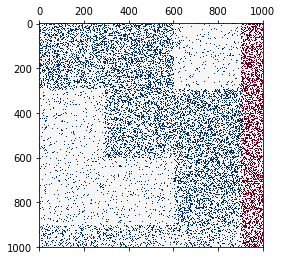

In [14]:
plt.matshow(noisy_network.adjacency_matrix, cmap="RdBu");

And it has more connections at blocks where no connections were present before shuffling. This did also alter the cycles. Let's check the cycles again.

In [15]:
cycle_analysis(network=noisy_network)

{'relative_cycles_5': 0.6844814540557197}

The network has now more cycles as compared to the noise free version..